# Wrongful Conviction in US

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import sys
import csv

from collections import defaultdict, Counter

sb.set()
sb.set_style('darkgrid')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)



#### Load Dataset from Local Machine

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Wrongful Convictions in the United States\Wrongful Convictions in the United States.csv")
df.head(2)

,Unnamed: 0,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1
1,1,1843,John Gordon,murder,Rhode Island,death,yes,1


#### Statistical Representation

In [3]:
df.shape

(178, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  178 non-null    int64 
 1   Date of the Crime           178 non-null    int64 
 2   Defendants                  178 non-null    object
 3   Type of the Crime           178 non-null    object
 4   Location of the Crime       178 non-null    object
 5   Punishment for a crime      169 non-null    object
 6   Legally Exonerated          178 non-null    object
 7   Legally Exonerated Encoded  178 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ KB


In [5]:
round(df.describe())

,Unnamed: 0,Date of the Crime,Legally Exonerated Encoded
count,178.0,178.0,178.0
mean,88.0,1980.0,1.0
std,52.0,35.0,0.0
min,0.0,1805.0,0.0
25%,44.0,1978.0,1.0
50%,88.0,1986.0,1.0
75%,133.0,1998.0,1.0
max,177.0,2017.0,1.0


In [6]:
df.isnull().sum()

Unnamed: 0                    0
Date of the Crime             0
Defendants                    0
Type of the Crime             0
Location of the Crime         0
Punishment for a crime        9
Legally Exonerated            0
Legally Exonerated Encoded    0
dtype: int64

#### Graphical Presentation

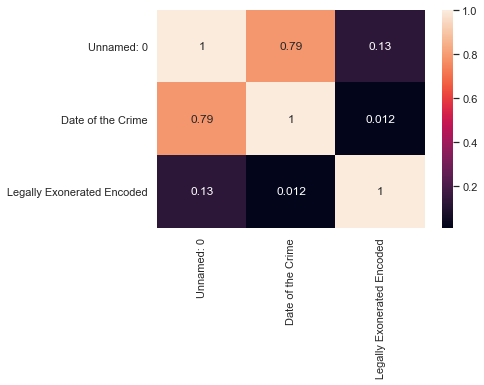

In [7]:
sb.heatmap(df.corr(), annot = True)

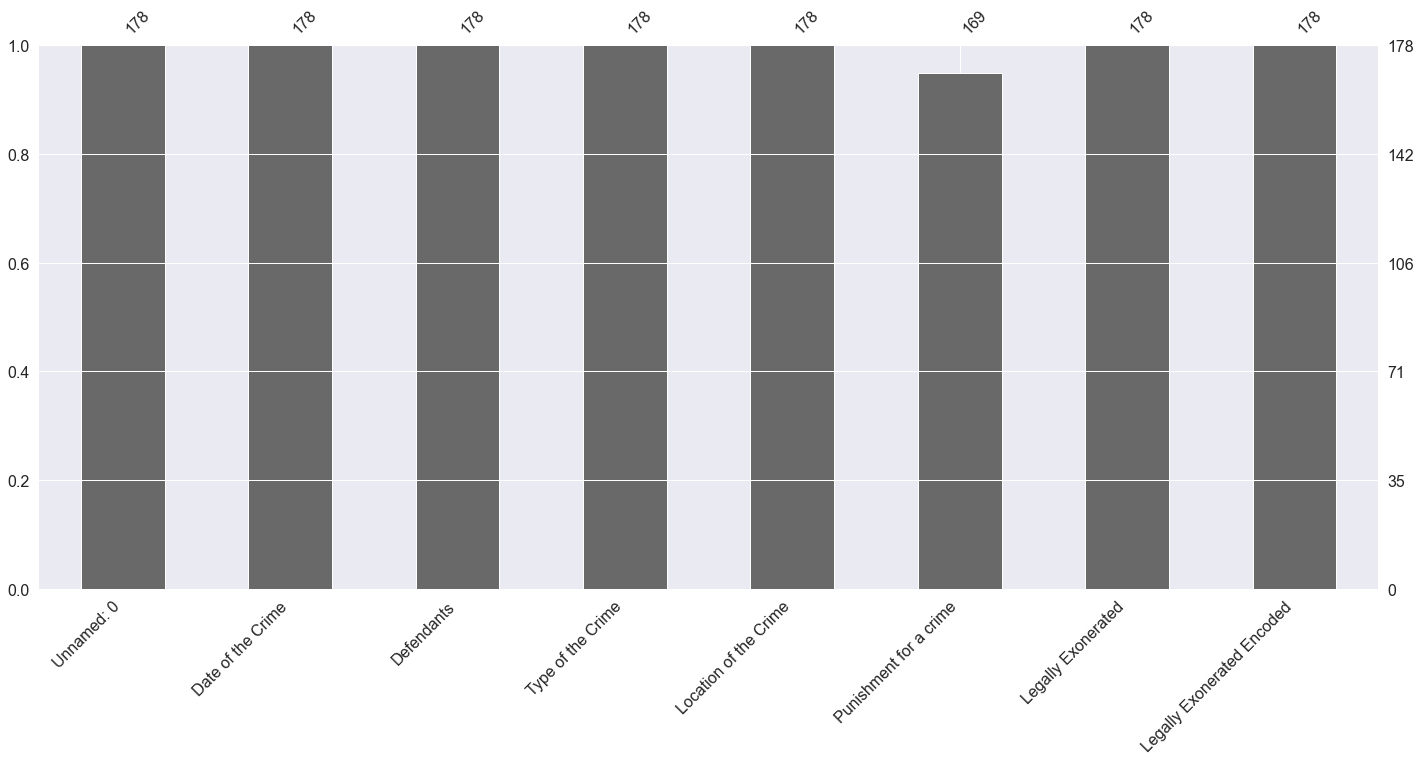

In [8]:
msno.bar(df)

#### Data Exploration and Cleaning

In [9]:
df.dropna(axis = 'index', how = 'any', inplace = True)
df.isnull().sum()

Unnamed: 0                    0
Date of the Crime             0
Defendants                    0
Type of the Crime             0
Location of the Crime         0
Punishment for a crime        0
Legally Exonerated            0
Legally Exonerated Encoded    0
dtype: int64

In [10]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head(3).sample()

,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1


In [55]:
with open("D:\Open Classroom\Datasets\Wrongful Convictions in the United States\Wrongful Convictions in the United States.csv") as file:
    filereader = csv.DictReader(file)
    filecounter = Counter()
    
    #file = [str(i.strip().split(',') for i in filereader)]
    
    file = []
    for i in filereader:
        file = i['Type of the Crime'].split(',')
        
        #for f in file:
            #file = file.strip()
            
        for j in file:
            filecounter[j] += 1 

print(filecounter)

Counter({'murder': 111, 'rape': 23, ' robbery': 9, 'sexual assault': 8, 'child sexual abuse': 5, 'robbery': 4, ' rape': 4, 'assault': 4, ' illegal use of a weapon': 4, ' kidnapping': 4, ' murder': 4, ' assault': 4, 'satanic ritual sex abuse': 3, ' other violent felony': 3, 'child sex abuse': 3, 'haymarket affair': 1, 'sabotage of Locomotive 213': 1, 'preparedness Day Bombing': 1, 'breaking and entering': 1, ' petty theft': 1, '  murder': 1, ' burglary': 1, ' sodomy': 1, 'sexual abuse of children': 1, ' carjacking': 1, ' sexual abuse': 1, 'drive-by shooting': 1, 'criminal sexual conduct': 1, ' armed robbery': 1, 'filing a false report': 1, 'child abuse': 1, 'manslaughter': 1, 'manslaughter of infant': 1, 'weapon possession or sale': 1, 'fraud': 1, 'felony assault of a child': 1, 'attempted murder': 1, ' conspiracy': 1, 'theft': 1, ' gun possession or sale and conspiracy': 1, 'arson': 1})
